<a href="https://colab.research.google.com/github/shotzyabisk/ML/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df = pd.read_csv("WalmartProducts.csv")

In [ ]:
df

,index,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,walmart.com,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,This product works great. It's exactly what I ...,Diane,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,1,d10f87c07c206c72b0b5ddbf90541b38,2020-03-27 13:15:01 +0000,https://www.walmart.com/reviews/product/247042233,walmart.com,NaN,1.0,My carrier said this phone had been activated ...,Bren,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,walmart.com,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,The picture on this TV is better than any TV I...,Hieronymesque,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,3,183ab6b4ec58daae79c66d0151400b63,2020-02-17 03:11:54 +0000,https://www.walmart.com/reviews/product/665198047,walmart.com,TSV For Fitbit Charge 3 USB Charging Cradle Wa...,5.0,NaN,D,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,walmart.com,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,Very well-balanced between the highs and the l...,Dubbsta,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,4593,5a75ebdcb3ee514753d2ba8e0f400673,2020-02-05 13:36:27 +0000,https://www.walmart.com/reviews/product/37648943,walmart.com,Apple iPad Air 2 Wi-Fi 16GB (Refurbished),5.0,I received $75.00 off this purchase just for b...,xlt325,0,0,Yes,No,10/12/2015,100.0,12.0,3.0,0.0,5.0
4594,4594,1c2d09ad6c0aa6332bfcf15e4047239c,2020-03-02 01:22:31 +0000,https://www.walmart.com/reviews/product/29749071,walmart.com,Straight Talk Broadband 1GB $15 (Email Delivery),1.0,I use this in my rv when the campground wifi i...,BobR,2,1,No,No,10/8/2016,28.0,10.0,4.0,2.0,22.0
4595,4595,3eb6ab1f9cb33138ed62330cf8a18a29,2020-02-05 18:01:26 +0000,https://www.walmart.com/reviews/product/49129475,walmart.com,Ultimate Ears UE BOOM 2 Portable Bluetooth Spe...,5.0,"I use it during baseball training, while I mak...",DOGGY,1,0,Yes,No,4/12/2018,253.0,103.0,30.0,20.0,57.0
4596,4596,4ee2cbc7bf75eb7a304d8685fee8ab5c,2020-02-24 02:23:42 +0000,https://www.walmart.com/reviews/product/784572271,walmart.com,Blackweb True Wireless Bluetooth Earbuds - Black,3.0,Okay so they look super cool with the design a...,nani,0,0,Yes,No,9/3/2019,113.0,33.0,27.0,28.0,60.0


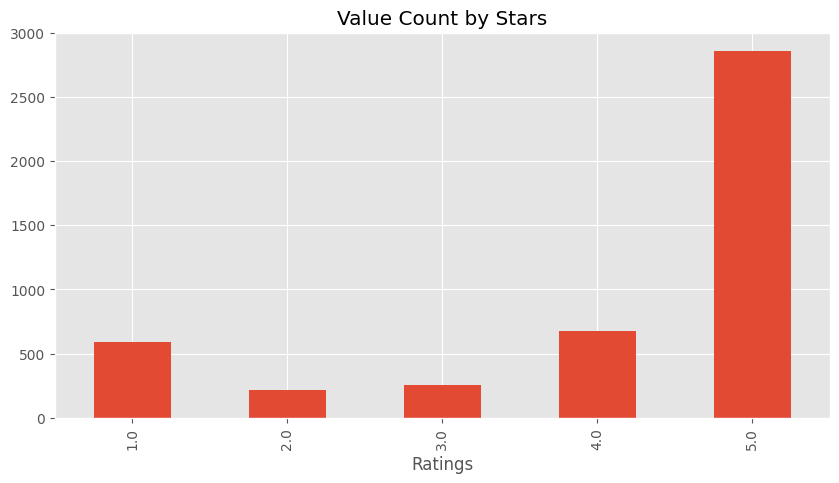

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Value Count by Stars',
          figsize=(10, 5))
ax.set_xlabel('Ratings')
plt.show()

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
ex = df['Review'][1]
ex

'My carrier said this phone had been activated before yet I purchased it as a new phone. I am really getting sick of Walmart. Tired of them getting over on people like this.'

In [ ]:
tokens = nltk.word_tokenize(ex)
tokens

['My',
 'carrier',
 'said',
 'this',
 'phone',
 'had',
 'been',
 'activated',
 'before',
 'yet',
 'I',
 'purchased',
 'it',
 'as',
 'a',
 'new',
 'phone',
 '.',
 'I',
 'am',
 'really',
 'getting',
 'sick',
 'of',
 'Walmart',
 '.',
 'Tired',
 'of',
 'them',
 'getting',
 'over',
 'on',
 'people',
 'like',
 'this',
 '.']

In [ ]:
tagged  = nltk.pos_tag(tokens)
tagged[:5]

[('My', 'PRP$'),
 ('carrier', 'NN'),
 ('said', 'VBD'),
 ('this', 'DT'),
 ('phone', 'NN')]

In [ ]:
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  My/PRP$
  carrier/NN
  said/VBD
  this/DT
  phone/NN
  had/VBD
  been/VBN
  activated/VBN
  before/IN
  yet/RB
  I/PRP
  purchased/VBD
  it/PRP
  as/IN
  a/DT
  new/JJ
  phone/NN
  ./.
  I/PRP
  am/VBP
  really/RB
  getting/VBG
  sick/NN
  of/IN
  (GPE Walmart/NNP)
  ./.
  Tired/NNP
  of/IN
  them/PRP
  getting/VBG
  over/IN
  on/IN
  people/NNS
  like/IN
  this/DT
  ./.)


Model 1: Vader Sentiment Scoring


In [ ]:
va = SentimentIntensityAnalyzer()

In [ ]:
va.polarity_scores("this product is really nice")

{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.4754}

In [ ]:
va.polarity_scores("the phone is bad")

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    id = row['index']
    res[id]= va.polarity_scores(str(text))

  0%|          | 0/30006 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.000,0.687,0.313,0.6249
1,0.180,0.750,0.069,-0.6096
2,0.036,0.838,0.125,0.4804
3,0.000,1.000,0.000,0.0000
4,0.000,0.848,0.152,0.9579
...,...,...,...,...
30001,0.026,0.693,0.281,0.9793
30002,0.040,0.826,0.134,0.7650
30003,0.000,0.355,0.645,0.8977
30004,0.135,0.865,0.000,-0.1027


In [ ]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders

,Id,neg,neu,pos,compound
0,0,0.000,0.687,0.313,0.6249
1,1,0.180,0.750,0.069,-0.6096
2,2,0.036,0.838,0.125,0.4804
3,3,0.000,1.000,0.000,0.0000
4,4,0.000,0.848,0.152,0.9579
...,...,...,...,...,...
30001,30001,0.026,0.693,0.281,0.9793
30002,30002,0.040,0.826,0.134,0.7650
30003,30003,0.000,0.355,0.645,0.8977
30004,30004,0.135,0.865,0.000,-0.1027


In [ ]:
vaders = vaders.merge(df, how='left' ,left_on = df['index'],right_on=vaders['Id'])
vaders

,key_0,Id,neg,neu,pos,compound,index,Uniq Id,Crawl Timestamp,Pageurl,...,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,0,0,0.000,0.687,0.313,0.6249,0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,...,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,1,1,0.180,0.750,0.069,-0.6096,1,d10f87c07c206c72b0b5ddbf90541b38,2020-03-27 13:15:01 +0000,https://www.walmart.com/reviews/product/247042233,...,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,2,2,0.036,0.838,0.125,0.4804,2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,...,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,3,3,0.000,1.000,0.000,0.0000,3,183ab6b4ec58daae79c66d0151400b63,2020-02-17 03:11:54 +0000,https://www.walmart.com/reviews/product/665198047,...,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,4,4,0.000,0.848,0.152,0.9579,4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,...,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,30001,30001,0.026,0.693,0.281,0.9793,30001,4178dbe3f07460ef7dabf4d74fe073a4,2020-02-05 13:15:01 +0000,https://www.walmart.com/reviews/product/20370542,...,1,0,Yes,No,7/22/2014,1305.0,411.0,133.0,79.0,288.0
30002,30002,30002,0.040,0.826,0.134,0.7650,30002,7a1dd867019edd13c34d04bfa239b469,2020-02-05 14:18:31 +0000,https://www.walmart.com/reviews/product/21806608,...,0,0,No,No,3/31/2019,293.0,145.0,44.0,73.0,224.0
30003,30003,30003,0.000,0.355,0.645,0.8977,30003,5bb0e009b18c7305342f724579df7a63,2020-02-17 05:23:43 +0000,https://www.walmart.com/reviews/product/46796007,...,26,13,Yes,No,12/22/2015,16.0,3.0,3.0,1.0,1.0
30004,30004,30004,0.135,0.865,0.000,-0.1027,30004,32d3eae700fdb361001f73f68bd92475,2020-01-08 13:44:46 +0000,https://www.walmart.com/reviews/product/454328077,...,0,0,No,No,7/29/2019,274.0,58.0,28.0,18.0,33.0


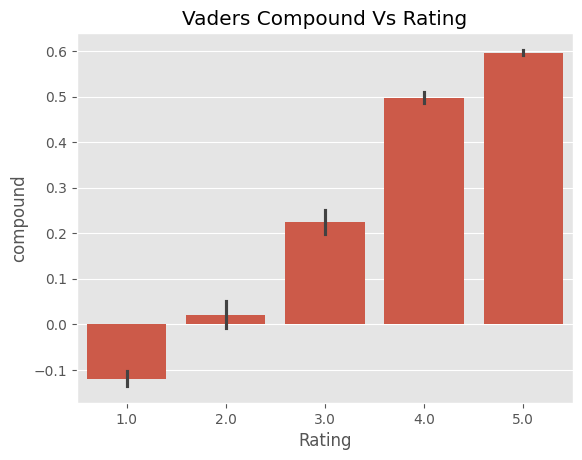

In [ ]:
ax = sns.barplot(data = vaders , x = 'Rating',y = 'compound')
ax.set_title('Vaders Compound Vs Rating')
plt.show()

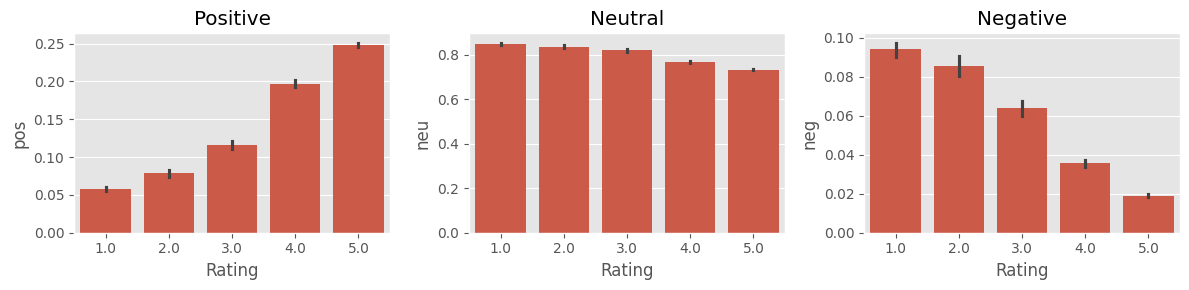

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Model 2: Roberta Pretrained Model

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(ex)

My carrier said this phone had been activated before yet I purchased it as a new phone. I am really getting sick of Walmart. Tired of them getting over on people like this.


Comparing scores of Vader vs Roverta Model

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(ex, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.94016004, 'roberta_neu': 0.053510312, 'roberta_pos': 0.0063297176}


In [ ]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
new_df = df[:5000]
new_df

,index,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,walmart.com,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,This product works great. It's exactly what I ...,Diane,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,1,d10f87c07c206c72b0b5ddbf90541b38,2020-03-27 13:15:01 +0000,https://www.walmart.com/reviews/product/247042233,walmart.com,NaN,1.0,My carrier said this phone had been activated ...,Bren,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,walmart.com,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,The picture on this TV is better than any TV I...,Hieronymesque,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,3,183ab6b4ec58daae79c66d0151400b63,2020-02-17 03:11:54 +0000,https://www.walmart.com/reviews/product/665198047,walmart.com,TSV For Fitbit Charge 3 USB Charging Cradle Wa...,5.0,NaN,D,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,walmart.com,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,Very well-balanced between the highs and the l...,Dubbsta,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,66be43cfe477ed992c72aed0c409a1be,2020-03-27 20:59:53 +0000,https://www.walmart.com/reviews/product/118984289,walmart.com,NaN,5.0,It has been the best TV I have ever had !!!! I...,NaN,0,0,No,No,6/12/2019,847.0,163.0,18.0,8.0,11.0
4996,4996,f007ca0672e999fe9ec42f7ccf4d91c3,2020-02-05 11:21:48 +0000,https://www.walmart.com/reviews/product/592924419,walmart.com,"Wireless Earbuds, ABLEGRID Bluetooth 5.0 TWS T...",5.0,So far these are great earbuds. Comfortable an...,pete,0,0,No,No,11/25/2019,21.0,6.0,7.0,1.0,2.0
4997,4997,ae1b0a75551255a0be304331a04cd633,2020-03-02 04:16:25 +0000,https://www.walmart.com/reviews/product/172813797,walmart.com,"SAMSUNG 32"" Class FHD (1080P) Smart LED TV (UN...",5.0,My Grandson's wanted this tv it arrived before...,Rocksy,0,0,No,No,12/27/2019,242.0,64.0,24.0,8.0,17.0
4998,4998,de74327afd7614e23aa8decd8ba79f93,2020-03-27 13:19:12 +0000,https://www.walmart.com/reviews/product/636304362,walmart.com,NaN,5.0,NaN,Mikehancho,0,0,No,No,1/2/2020,8.0,1.0,0.0,1.0,2.0


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['index']
        vader_result = va.polarity_scores(str(text))
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(str(text))
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except IndexError:
        print(f'Broke for id {myid}')
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/30006 [00:00<?, ?it/s]

Broke for id 246
Broke for id 687
Broke for id 846
Broke for id 849
Broke for id 1111
Broke for id 1683
Broke for id 1777
Broke for id 2164
Broke for id 2197
Broke for id 2314
Broke for id 2486
Broke for id 2644
Broke for id 2907
Broke for id 2923
Broke for id 3322
Broke for id 3516
Broke for id 4330
Broke for id 4486
Broke for id 4749
Broke for id 4803
Broke for id 4878
Broke for id 5556
Broke for id 6955
Broke for id 7739
Broke for id 9294
Broke for id 9326
Broke for id 9679
Broke for id 10511
Broke for id 10857
Broke for id 10972
Broke for id 11514
Broke for id 11634
Broke for id 12826
Broke for id 13704
Broke for id 13720
Broke for id 14564
Broke for id 15179
Broke for id 15944
Broke for id 15963
Broke for id 16192
Broke for id 16617
Broke for id 16943
Broke for id 17718
Broke for id 18405
Broke for id 18411
Broke for id 19339
Broke for id 19677
Broke for id 19985
Broke for id 20274
Broke for id 20295
Broke for id 20578
Broke for id 20619
Broke for id 21119
Broke for id 21220
Broke

In [ ]:
res

{0: {'vader_neg': 0.0,
  'vader_neu': 0.687,
  'vader_pos': 0.313,
  'vader_compound': 0.6249,
  'roberta_neg': 0.0018276925,
  'roberta_neu': 0.010746593,
  'roberta_pos': 0.9874257},
 1: {'vader_neg': 0.18,
  'vader_neu': 0.75,
  'vader_pos': 0.069,
  'vader_compound': -0.6096,
  'roberta_neg': 0.94016004,
  'roberta_neu': 0.05351028,
  'roberta_pos': 0.0063297176},
 2: {'vader_neg': 0.036,
  'vader_neu': 0.838,
  'vader_pos': 0.125,
  'vader_compound': 0.4804,
  'roberta_neg': 0.0059268703,
  'roberta_neu': 0.019830745,
  'roberta_pos': 0.9742424},
 3: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.2395022,
  'roberta_neu': 0.5281889,
  'roberta_pos': 0.23230894},
 4: {'vader_neg': 0.0,
  'vader_neu': 0.848,
  'vader_pos': 0.152,
  'vader_compound': 0.9579,
  'roberta_neg': 0.025318732,
  'roberta_neu': 0.12981345,
  'roberta_pos': 0.8448678},
 5: {'vader_neg': 0.12,
  'vader_neu': 0.817,
  'vader_pos': 0.063,
  'vader_compound

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
new_df = results_df.merge(df, how='inner',right_on = df['index'],left_on=results_df['Id'])

In [ ]:
new_df

,key_0,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,index,...,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,0,0,0.000,0.687,0.313,0.6249,0.001828,0.010747,0.987426,0,...,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,1,1,0.180,0.750,0.069,-0.6096,0.940160,0.053510,0.006330,1,...,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,2,2,0.036,0.838,0.125,0.4804,0.005927,0.019831,0.974242,2,...,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,3,3,0.000,1.000,0.000,0.0000,0.239502,0.528189,0.232309,3,...,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,4,4,0.000,0.848,0.152,0.9579,0.025319,0.129813,0.844868,4,...,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29926,30001,30001,0.026,0.693,0.281,0.9793,0.002998,0.027514,0.969488,30001,...,1,0,Yes,No,7/22/2014,1305.0,411.0,133.0,79.0,288.0
29927,30002,30002,0.040,0.826,0.134,0.7650,0.277309,0.441148,0.281543,30002,...,0,0,No,No,3/31/2019,293.0,145.0,44.0,73.0,224.0
29928,30003,30003,0.000,0.355,0.645,0.8977,0.001864,0.017542,0.980594,30003,...,26,13,Yes,No,12/22/2015,16.0,3.0,3.0,1.0,1.0
29929,30004,30004,0.135,0.865,0.000,-0.1027,0.739650,0.238923,0.021427,30004,...,0,0,No,No,7/29/2019,274.0,58.0,28.0,18.0,33.0


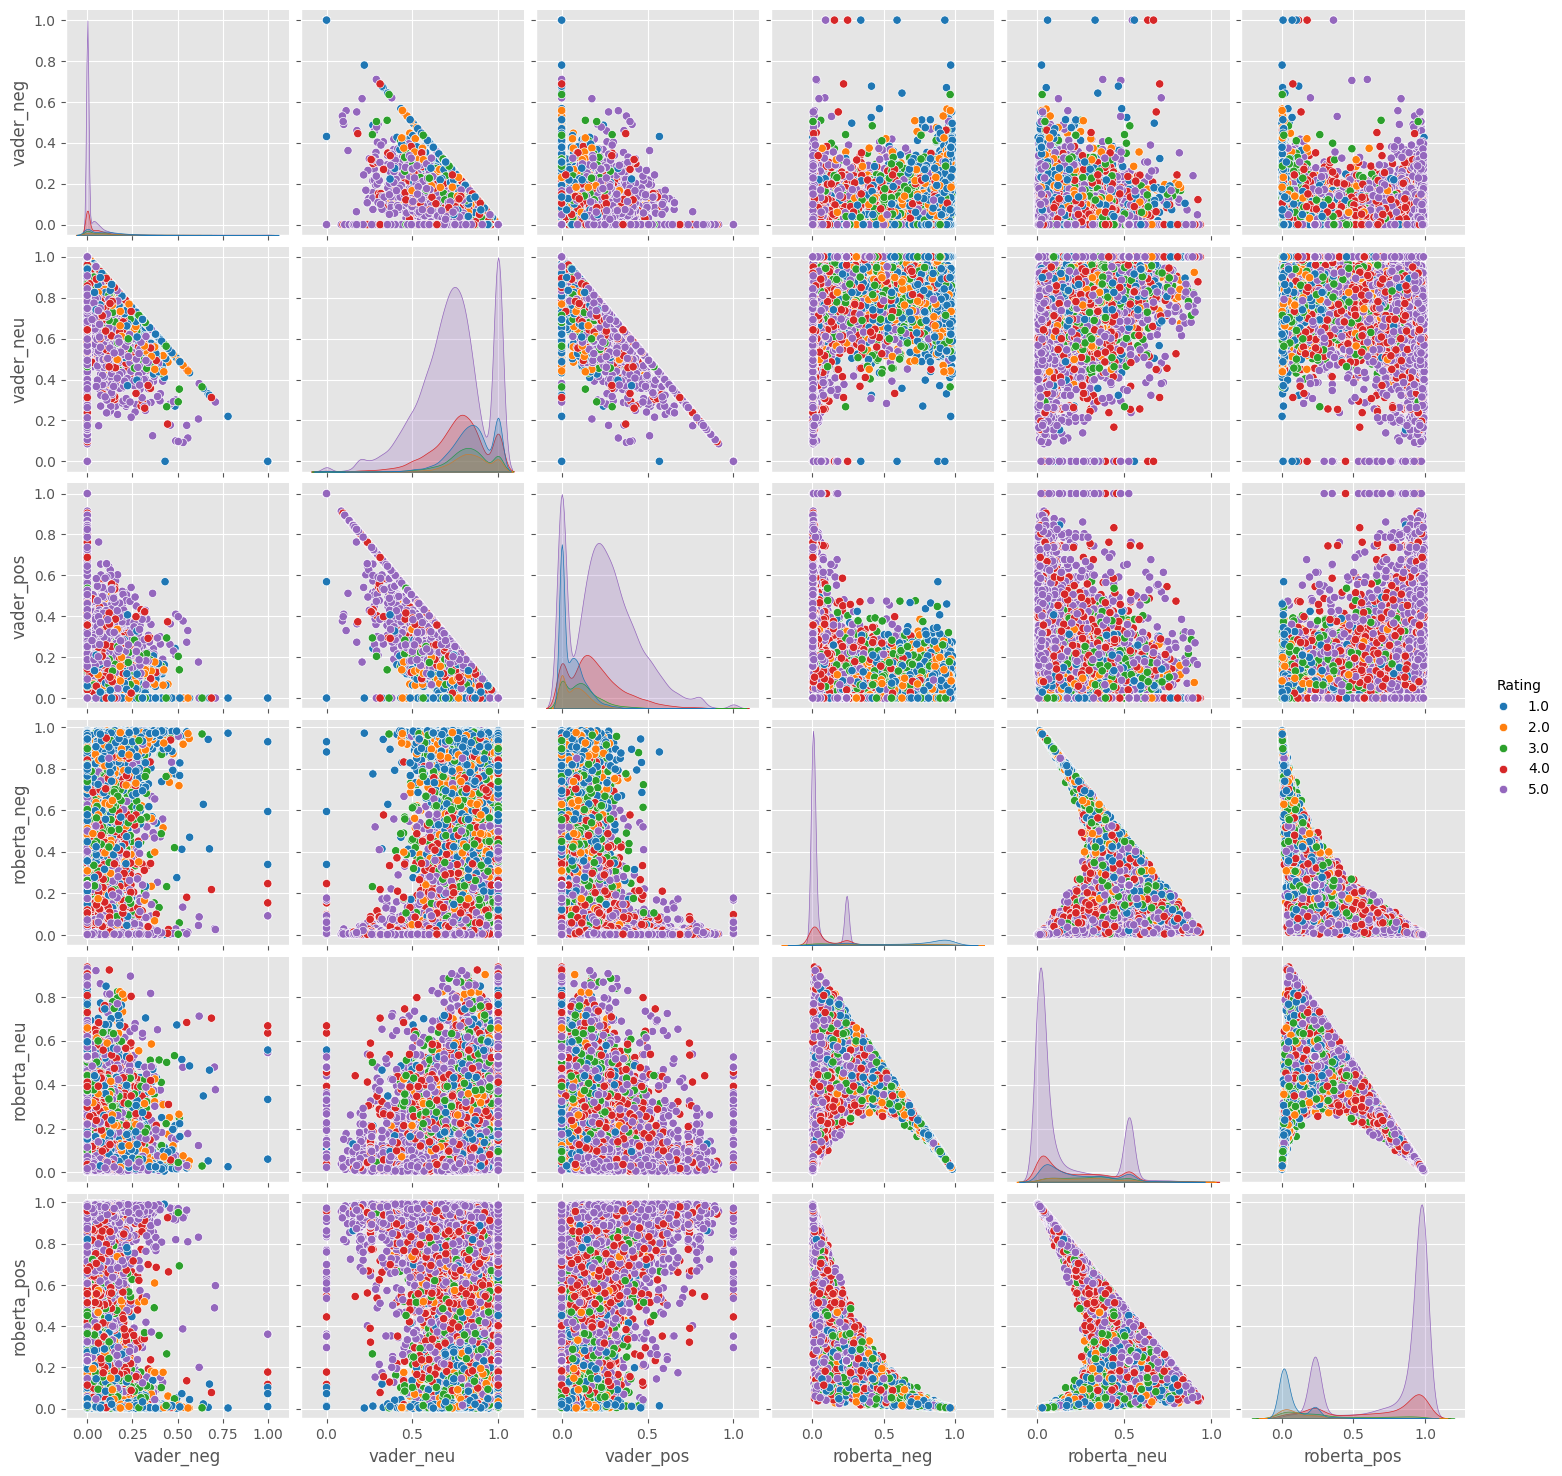

In [ ]:
sns.pairplot(data=new_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()